In [56]:
pwd

'C:\\Users\\13abh\\Music\\MDU'

In [57]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [58]:
data = pd.read_csv('Churn_Dataset.csv')

In [59]:
data.head(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure(Months),PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,88,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5986 non-null   object 
 1   Gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   Tenure(Months)    5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [61]:
data.shape

(5986, 21)

In [62]:
file_path= 'C:\\Users\\13abh\\Music\\MDU\\data1.csv'
data.to_csv(file_path, index=False)

In [63]:
missing_values = data.isnull().sum()
print(missing_values)

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure(Months)      0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [64]:
data.dropna(subset=['TotalCharges'], inplace=True)

In [65]:
churn_counts = data['Churn'].value_counts()
print("Class distribution in the 'Churn' column:")
print(churn_counts)

Class distribution in the 'Churn' column:
No     4399
Yes    1587
Name: Churn, dtype: int64


In [66]:
Contract = data['Contract'].unique() # Print the unique values

for i in Contract:  
    print(i)
    
mapping = {
    'Two year': 24,
    'Month-to-month': 1,
    'One year': 12,
}

data['Contract'] = data['Contract'].replace(mapping)
data.head()

Two year
Month-to-month
One year


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure(Months),PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,88,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,24,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,1,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,1,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,1,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,1,No,Electronic check,53.45,119.5,No


In [67]:
PaymentMethod = data['PaymentMethod'].unique()

for i in PaymentMethod:
    print(i)
    
mapping = {
    'Credit card (automatic)': 100,
    'Bank transfer (automatic)': 200,
    'Electronic check': 300,
    'Mailed check': 400
}

data['PaymentMethod'] = data['PaymentMethod'].replace(mapping)
data.head()

Credit card (automatic)
Bank transfer (automatic)
Electronic check
Mailed check


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure(Months),PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,88,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,24,No,100,24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,1,Yes,100,88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,1,Yes,200,74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,1,Yes,300,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,1,No,300,53.45,119.5,No


In [68]:
from imblearn.over_sampling import RandomOverSampler

X = data.drop(columns=['Churn'])
y = data['Churn']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

balanced_data = y_resampled.value_counts()
print("Class distribution after resampling:")
print(balanced_data)

Class distribution after resampling:
No     4399
Yes    4399
Name: Churn, dtype: int64


In [69]:
# Concatenate the DataFrames horizontally (along columns) to create the balanced dataset
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
balanced_data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure(Months),PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,88,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,24,No,100,24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,1,Yes,100,88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,1,Yes,200,74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,1,Yes,300,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,1,No,300,53.45,119.5,No


In [70]:
columns_to_replace = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

replace_mapping = {"Yes": 1, "No": 0, "No internet service": 2, "No phone service": 2}  # Replace "other_value" with the actual value you want to handle as 2

for column in columns_to_replace:
    balanced_data[column] = balanced_data[column].replace(replace_mapping)

In [71]:
balanced_data['TotalCharges'] = pd.to_numeric(balanced_data['TotalCharges'], errors='coerce')

In [72]:
balanced_data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure(Months),PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,1,1,88,1,1,No,2,...,2,2,2,2,24,0,100,24.10,1734.65,0
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,...,1,0,1,0,1,1,100,88.15,3973.20,0
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,...,0,0,0,0,1,1,200,74.95,2869.85,1
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,...,0,0,0,1,1,1,300,55.90,238.50,0
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,...,1,0,0,0,1,0,300,53.45,119.50,0


In [73]:
balanced_data.describe()

,SeniorCitizen,Partner,Dependents,Tenure(Months),PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000,8788.000000,8798.000000
mean,0.189816,0.446010,0.259832,27.978177,0.904069,0.626392,0.580586,0.659809,0.659468,0.583996,0.738804,0.738691,6.854285,0.638100,263.991816,67.935877,2065.276257,0.500000
std,0.392178,0.497105,0.438567,24.019383,0.294513,0.652637,0.759493,0.746848,0.746921,0.759123,0.725458,0.725496,8.805369,0.480578,101.064364,28.852087,2191.532185,0.500028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,200.000000,45.400000,272.312500,0.000000
50%,0.000000,0.000000,0.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,300.000000,74.500000,1183.600000,0.500000
75%,0.000000,1.000000,1.000000,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,300.000000,91.000000,3314.637500,1.000000
max,1.000000,1.000000,1.000000,88.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,1.000000,400.000000,118.750000,8684.800000,1.000000


In [74]:
import matplotlib.pyplot as plt

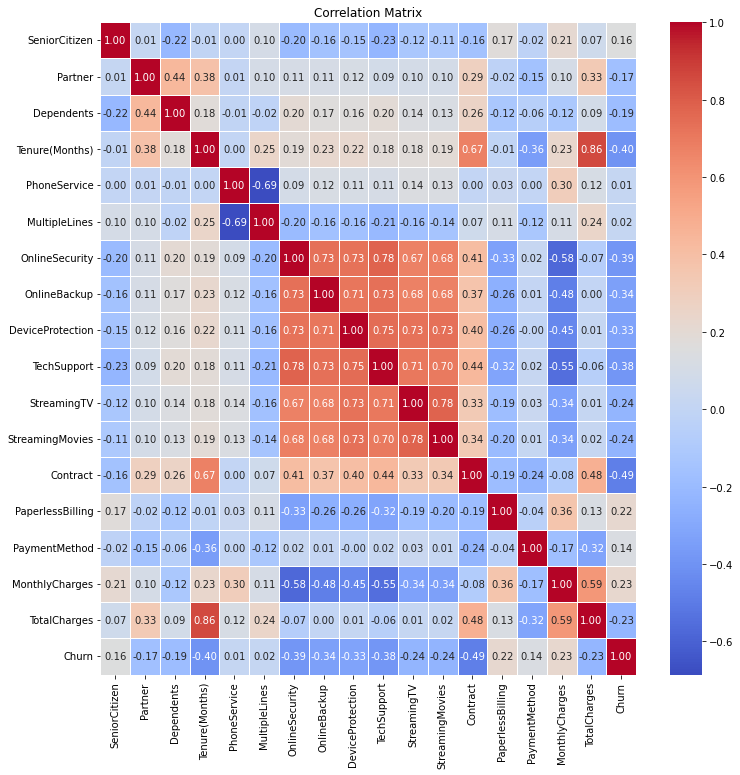

In [75]:
correlation_matrix = balanced_data.corr()
plt.figure(figsize=(12, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

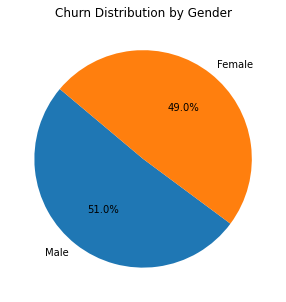

In [76]:
import matplotlib.pyplot as pltp

gender_counts = data['Gender'].value_counts()
churn_counts = data.groupby('Gender')['Churn'].sum()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution by Gender')
plt.show()


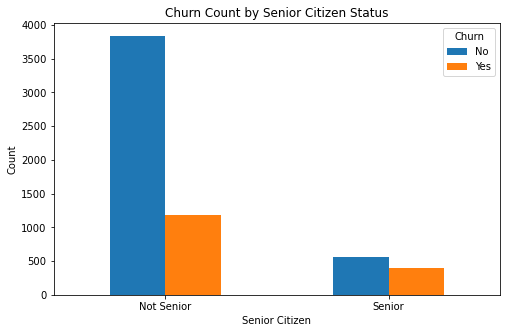

In [77]:
churn_counts = data.groupby('SeniorCitizen')['Churn'].value_counts().unstack(fill_value=0)

churn_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Churn Count by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Senior', 'Senior'], rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


### Building the predictive model

In [78]:
columns_to_select = ['Dependents', 'Tenure(Months)', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

X = balanced_data[columns_to_select]

In [79]:
y = balanced_data['Churn']

In [80]:
X.head()

,Dependents,Tenure(Months),InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,88,No,2,2,2,2,24,100,24.10,1734.65
1,0,44,Fiber optic,0,1,1,0,1,100,88.15,3973.20
2,0,38,Fiber optic,0,0,0,0,1,200,74.95,2869.85
3,0,4,DSL,0,0,0,0,1,300,55.90,238.50
4,0,2,DSL,1,0,1,0,1,300,53.45,119.50


In [81]:
PaymentMethod = data['PaymentMethod'].unique()

# Print the unique values
for i in PaymentMethod:
    print(i)
    
mapping = {
    'Credit card (automatic)': 100,
    'Bank transfer (automatic)': 200,
    'Electronic check': 300,
    'Mailed check': 400
}

# Replace the values in the 'InternetService' column
X['PaymentMethod'] = X['PaymentMethod'].replace(mapping)

# Print the updated DataFrame
X.head()

100
200
300
400


C:\Users\13abh\AppData\Local\Temp\ipykernel_21168\1913025826.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PaymentMethod'] = X['PaymentMethod'].replace(mapping)


,Dependents,Tenure(Months),InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,88,No,2,2,2,2,24,100,24.10,1734.65
1,0,44,Fiber optic,0,1,1,0,1,100,88.15,3973.20
2,0,38,Fiber optic,0,0,0,0,1,200,74.95,2869.85
3,0,4,DSL,0,0,0,0,1,300,55.90,238.50
4,0,2,DSL,1,0,1,0,1,300,53.45,119.50


In [82]:
InternetService = data['InternetService'].unique()

for i in InternetService:
    print(i)

No
Fiber optic
DSL


In [83]:
mapping = {
    'No': 0,
    'Fiber optic': 11,
    'DSL': 22,
}

X['InternetService'] = X['InternetService'].replace(mapping)

X.head()

C:\Users\13abh\AppData\Local\Temp\ipykernel_21168\1592747664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['InternetService'] = X['InternetService'].replace(mapping)


,Dependents,Tenure(Months),InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,88,0,2,2,2,2,24,100,24.10,1734.65
1,0,44,11,0,1,1,0,1,100,88.15,3973.20
2,0,38,11,0,0,0,0,1,200,74.95,2869.85
3,0,4,22,0,0,0,0,1,300,55.90,238.50
4,0,2,22,1,0,1,0,1,300,53.45,119.50


In [84]:
Contract = data['Contract'].unique()

for i in Contract:
    print(i)
    
mapping = {
    'Two year': 24,
    'Month-to-month': 1,
    'One year': 12,
}

X['Contract'] = X['Contract'].replace(mapping)

X.head()

24
1
12


C:\Users\13abh\AppData\Local\Temp\ipykernel_21168\2149106296.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Contract'] = X['Contract'].replace(mapping)


,Dependents,Tenure(Months),InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,88,0,2,2,2,2,24,100,24.10,1734.65
1,0,44,11,0,1,1,0,1,100,88.15,3973.20
2,0,38,11,0,0,0,0,1,200,74.95,2869.85
3,0,4,22,0,0,0,0,1,300,55.90,238.50
4,0,2,22,1,0,1,0,1,300,53.45,119.50


In [85]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [86]:
# splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
X_train.shape

(7038, 11)

In [88]:
X_test.shape

(1760, 11)

In [89]:
y_train.shape

(7038,)

In [90]:
y_test.shape

(1760,)

In [91]:
file_path= 'C:\\Users\\13abh\\Music\\MDU\\dataX.csv'
X.to_csv(file_path, index=False)

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798 entries, 0 to 8797
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        8798 non-null   int64  
 1   Tenure(Months)    8798 non-null   int64  
 2   InternetService   8798 non-null   int64  
 3   OnlineSecurity    8798 non-null   int64  
 4   OnlineBackup      8798 non-null   int64  
 5   DeviceProtection  8798 non-null   int64  
 6   TechSupport       8798 non-null   int64  
 7   Contract          8798 non-null   int64  
 8   PaymentMethod     8798 non-null   int64  
 9   MonthlyCharges    8798 non-null   float64
 10  TotalCharges      8788 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 756.2 KB


In [93]:
X.head()

,Dependents,Tenure(Months),InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,88,0,2,2,2,2,24,100,24.10,1734.65
1,0,44,11,0,1,1,0,1,100,88.15,3973.20
2,0,38,11,0,0,0,0,1,200,74.95,2869.85
3,0,4,22,0,0,0,0,1,300,55.90,238.50
4,0,2,22,1,0,1,0,1,300,53.45,119.50


In [94]:
X_train = X_train.fillna(X_train.mean())

# Convert data to a suitable numerical format (float32).
X_train = X_train.astype('float32')
y_train = y_train.astype('int') 

# Model 1: Random Forest classifier

In [95]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, 
                                      min_samples_leaf=10, min_samples_split=6)

Rfc_sampling.fit(X_train, y_train)
rfc_sampling_pred = Rfc_sampling.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test)}')
#print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test)}')

Accuracy score : 0.8045454545454546
Classification report :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       832
           1       0.84      0.78      0.81       928

    accuracy                           0.80      1760
   macro avg       0.81      0.81      0.80      1760
weighted avg       0.81      0.80      0.80      1760



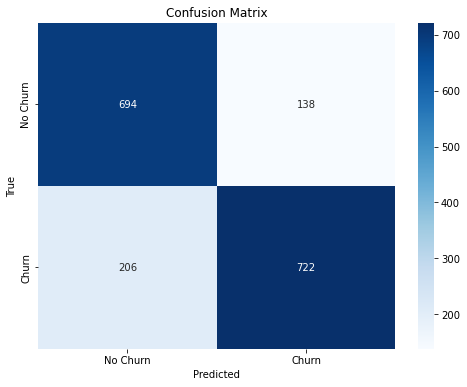

In [96]:
#Confusion matrix for RF
plt.figure(figsize=(8, 6))

conf_matrix = confusion_matrix(rfc_sampling_pred, y_test)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model 2 : naive_bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB
#multinomialNB
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

nb_pred = nb_classifier.predict(X_test)

#accuracy score
accuracy = accuracy_score(y_test, nb_pred)
print(f'Accuracy score: {accuracy}')

#classification report
class_report = classification_report(y_test, nb_pred)
print(f'Classification report:\n{class_report}')

Accuracy score: 0.625
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.54      0.60       900
           1       0.60      0.71      0.65       860

    accuracy                           0.62      1760
   macro avg       0.63      0.63      0.62      1760
weighted avg       0.63      0.62      0.62      1760



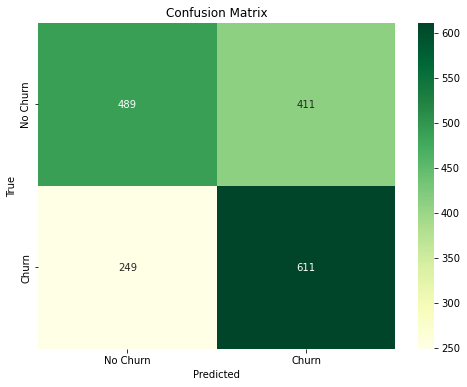

In [98]:
#confusion matrix for NB
conf_matrix_nb = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='YlGn', #Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Model 3 : Logistic Regg

In [99]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=200)  # You can adjust the max_iter as needed

lr_classifier.fit(X_train, y_train)

lr_pred = lr_classifier.predict(X_test)

accuracy = accuracy_score(y_test, lr_pred)
print(f'Accuracy score: {accuracy}')

class_report = classification_report(y_test, lr_pred)
print(f'Classification report:\n{class_report}')

Accuracy score: 0.7301136363636364
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       900
           1       0.70      0.78      0.74       860

    accuracy                           0.73      1760
   macro avg       0.73      0.73      0.73      1760
weighted avg       0.73      0.73      0.73      1760



C:\Users\13abh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


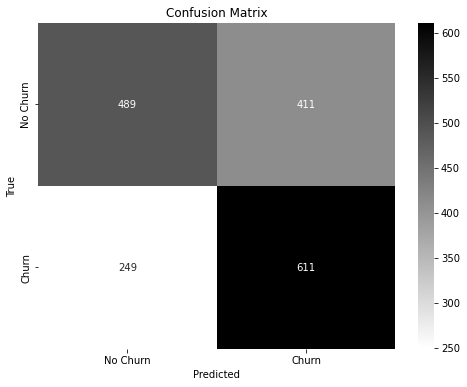

In [100]:
#confusion matrix
conf_matrix_Lr = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='binary',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [101]:
##Prediction

In [102]:
import pickle

In [103]:
filename = 'Model.sav'
pickle.dump(Rfc_sampling, open(filename,'wb'))

In [104]:
load_model = pickle.load(open(filename, 'rb'))

In [105]:
load_model.score(X_test, y_test)

0.8045454545454546

In [106]:
# 1.0	88.0	0	2.0	2.0	2.0	2.0	24	100.0	24.10	1734.65

In [107]:
new_row = [1.0, 4.0, 0, 2.0, 2.0, 2.0, 2.0, 1, 200.0, 24.10, 900.0]

In [108]:
new_row_array = np.array([new_row])

In [109]:
probability = Rfc_sampling.predict_proba(new_row_array)

C:\Users\13abh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [110]:
print(f'Predicted Probability: {probability}')

Predicted Probability: [[0.67522053 0.32477947]]
